COMO FUNCIONA UN ARBOL DE DECISION?

Para obtener el árbol óptimo y valorar cada subdivisión entre todos los árboles posibles y conseguir el nodo raiz y los subsiguientes, el algoritmo deberá medir de alguna manera las predicciones logradas y valorarlas para comparar de entre todas y obtener la mejor. Para medir y valorar, utiliza diversas funciones, siendo las más conocidas y usadas los “Indice gini” y “Ganancia de información” que utiliza la denominada “entropía“. La división de nodos continuará hasta que lleguemos a la profundidad máxima posible del árbol ó se limiten los nodos a una cantidad mínima de muestras en cada hoja. A continuación describiremos muy brevemente cada una de las estrategias nombradas

QUE ES EL INDICE DE GINI?

Se utiliza para atributos con valores continuos (precio de una casa). Esta función de coste mide el “grado de impureza” de los nodos, es decir, cuán desordenados o mezclados quedan los nodos una vez divididos. Deberemos minimizar ese GINI index.

QUE ES LA GANACIA DE INFORMACION?

Se utiliza para atributos categóricos (cómo en hombre/mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la “teoría de la información“. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable “X” se define la Entropia. Al obtener la medida de entropía de cada atributo, podemos calcular la ganancia de información del árbol. Deberemos maximizar esa ganancia.

QUIEN LLEGARA AL NUMERO 1?

In [ ]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

IMPORTAMOS DATOS DE ENTRADA

In [ ]:
artists_billboard = pd.read_csv("artists_billboard_fix3.csv")

In [ ]:
artists_billboard.shape

(635, 11)

In [ ]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


Vemos que tenemos: Titulo de la canción, artista, “mood” ó estado de ánimo de esa canción, tempo, género, Tipo de artista, fecha en que apareció en el billboard (por ejemplo 20140628 equivale al 28 de junio de 2014), la columna TOP será nuestra etiqueta, en la que aparece 1 si llegó al número uno de Billboard ó 0 si no lo alcanzó y el año de Nacimiento del artista. Vemos que muchas de las columnas contienen información categórica. La columna durationSeg contiene la duración en segundos de la canción, siendo un valor continuo pero que nos convendrá pasar a categórico más adelante.

CUANTOS ALCANZAN EL NUMERO 1?

In [ ]:
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

Es decir que tenemos 494 canciones que no alcanzaron la cima y a 141 que alcanzaron el número uno. Esto quiere decir que tenemos una cantidad DESBALANCEADA de etiquetas con 1 y 0. Lo tendremos en cuenta al momento de crear el árbol.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


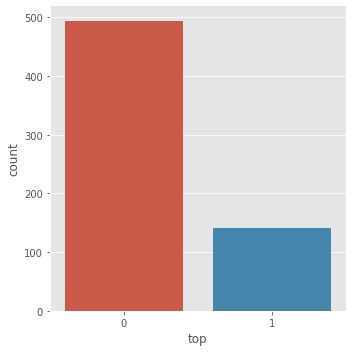

In [ ]:
sb.factorplot('top',data=artists_billboard,kind="count")

VISUALICEMOS DATOS DE ENTRADA

Veamos cuántos registros hay de tipo de artista, “mood”, tempo y género de las canciones:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


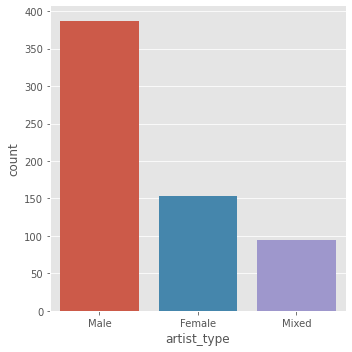

In [ ]:
sb.factorplot('artist_type',data=artists_billboard,kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


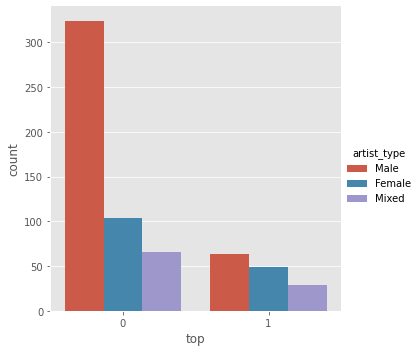

In [ ]:
sb.factorplot('top',data=artists_billboard,hue='artist_type',kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


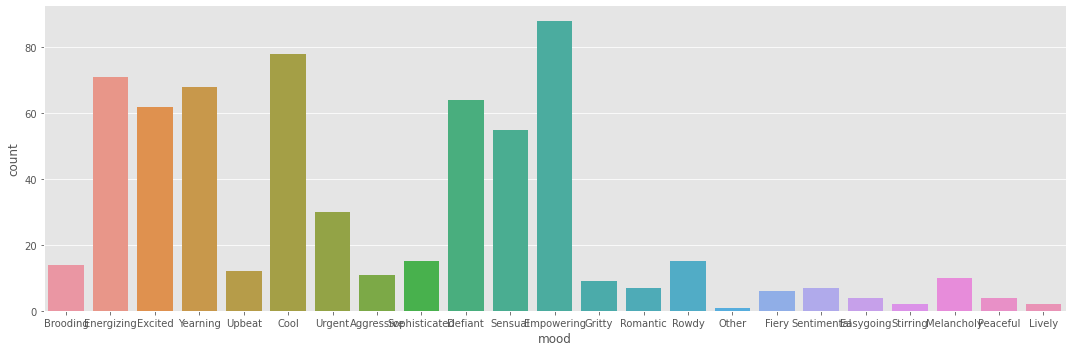

In [ ]:
sb.factorplot('mood',data=artists_billboard,kind="count", aspect=3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


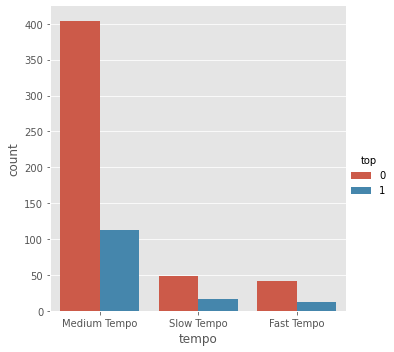

In [ ]:
sb.factorplot('tempo',data=artists_billboard,hue='top',kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


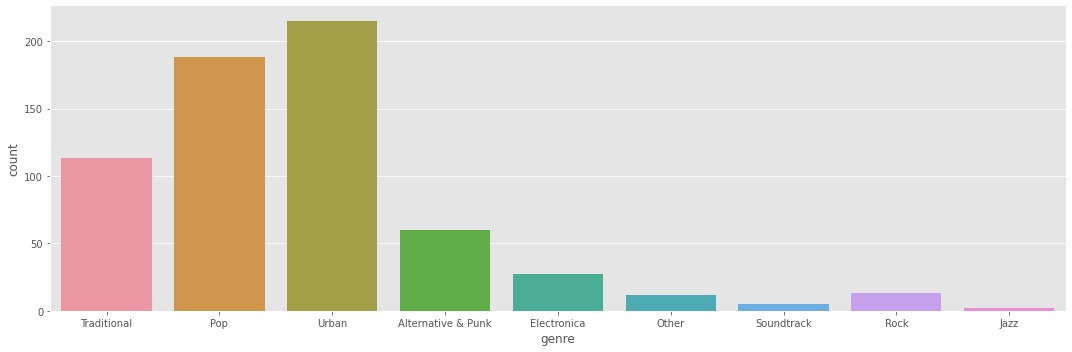

In [ ]:
sb.factorplot('genre',data=artists_billboard,kind="count", aspect=3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


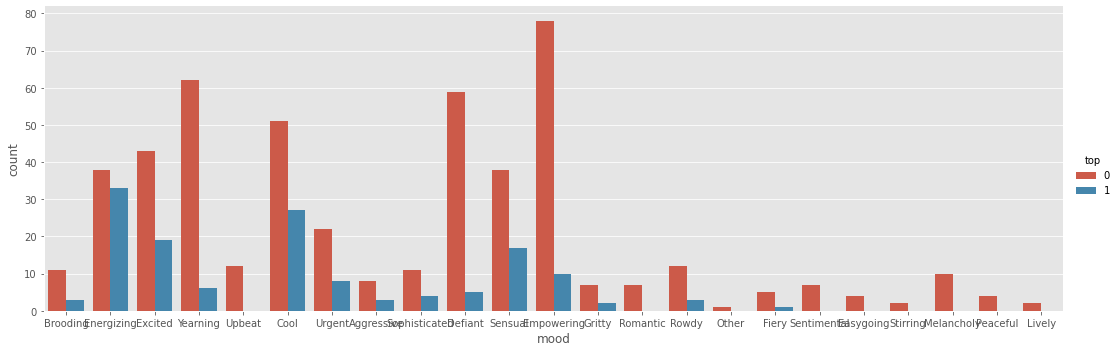

In [ ]:
sb.factorplot('mood',data=artists_billboard,hue='top',kind="count", aspect=3)

VISUALIZAMOS LOS AÑOS DE NACIMIENTO DE LOS ARTISTAS

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


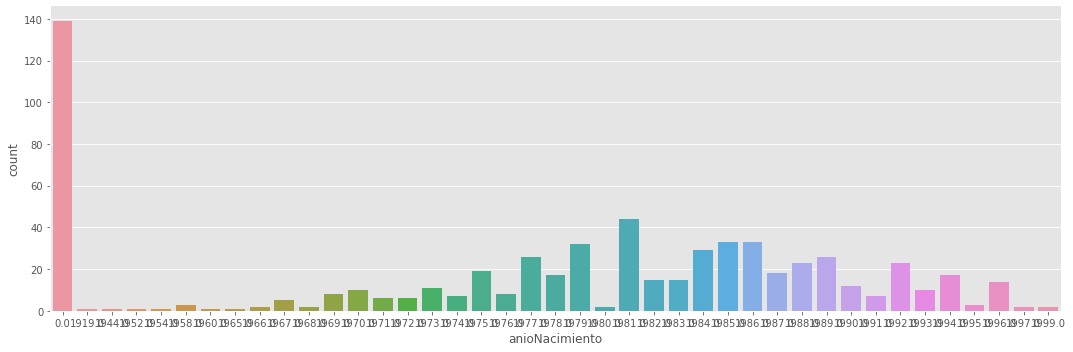

In [ ]:
sb.factorplot('anioNacimiento',data=artists_billboard,kind="count", aspect=3)

In [ ]:
nacimientosPorAnio = artists_billboard['anioNacimiento']
len(nacimientosPorAnio[nacimientosPorAnio<=0])

139

Notamos que tenemos 139 registros de canciones de las que desconocemos el año de nacimiento del artista. Deberemos tratar estos datos para poder utilizar el árbol.

COMPAREMOS LOS TOP Y LOS NON TOP

Como dijimos antes, no tenemos “equilibrio” en la cantidad de etiquetas top y “no-top” de las canciones. Esto se debe a que en el transcurso de un año, apenas unas 5 o 6 canciones logran el primer puesto y se mantienen durante varias semanas en ese puesto. Cuando inicialmente extraje las canciones, utilicé 2014 y 2015 y tenía apenas a 11 canciones en el top de Billboard y 494 que no llegaron.
Para intentar equilibrar los casos positivos agregué solamente los TOP de los años 2004 al 2013. Con eso conseguí los valores que tenemos en el archivo csv: son 494 “no-top” y 141 top. A pesar de esto sigue estando desbalanceado, y podríamos seguir agregando sólo canciones TOP de años previos, pero utilizaremos un parámetro (class_weight) del algoritmo de árbol de decisión para compensar esta diferencia.

Buscamos si hay alguna relación evidente entre Año y duración de Canción

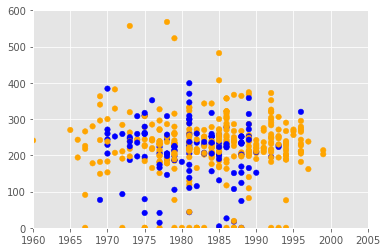

In [ ]:
colores=['orange','blue']
tamanios=[60,40]

f1 = artists_billboard['anioNacimiento'].values
f2 = artists_billboard['durationSeg'].values

asignar=[]
for index, row in artists_billboard.iterrows():    
    asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([1960,2005,0,600])
plt.show()

No parece haber ningún patron a la vista, están bastante mezclados los top de los no-top.

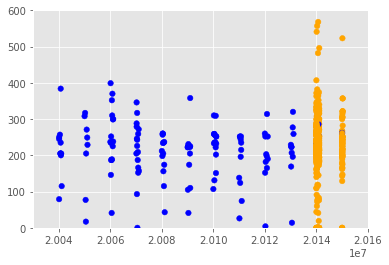

In [ ]:
colores=['orange','blue'] # si no estaban declarados previamente
tamanios=[60,40] # si no estaban declarados previamente

f1 = artists_billboard['chart_date'].values
f2 = artists_billboard['durationSeg'].values
  
asignar=[]
asignar2=[]
for index, row in artists_billboard.iterrows():    
    asignar.append(colores[row['top']])
    asignar2.append(tamanios[row['top']])
 
plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([20030101,20160101,0,600])
plt.show()

Esto es porque inicialmente tomamos información de 2014 y 2015 y había casi 500 no-top contra sólo 11 registros top. Entonces tomé a los artistas que alcanzaron el top entre 2004 y 2013 para sumar casos positivos y equilibrar un poco nuestros datos de entrada. Así y todo, sigue estando desbalanceado

ARREGLAR LAS EDADES DE LOS ARTISTAS

Primero vamos a sustituir los ceros de la columna “anioNacimiento”por el valor None -que es es nulo en Python-.

In [ ]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio

artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1);

Luego vamos a calcular las edades en una nueva columna “edad_en_billboard” restando el año de aparición (los 4 primeros caracteres de chart_date) al año de nacimiento. En las filas que estaba el año en None, tendremos como resultado edad None.

In [ ]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio

artists_billboard['edad_en_billboard']=artists_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1);

Y finalmente asignaremos edades aleatorias a los registros faltantes: para ello, obtenemos el promedio de edad de nuestro conjunto (avg) y su desvío estándar (std) -por eso necesitábamos las edades en None- y pedimos valores random a la función que van desde avg – std hasta avg + std. En nuestro caso son edades de entre 21 a 37 años.

In [ ]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,NaN


CALCULAMOS LA EDAD PROMEDIO

In [ ]:
age_avg = artists_billboard['edad_en_billboard'].mean()
age_std = artists_billboard['edad_en_billboard'].std()
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(artists_billboard['edad_en_billboard'])

artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list
artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


VISUALIZAMOS LAS EDADES QUE AGREGAMOS

Si bien lo ideal es contar con la información real, y de hecho la podemos obtener buscando en Wikipedia (o en otras webs de música), quise mostrar otra vía para poder completar datos faltantes manteniendo los promedios de edades que teníamos en nuestro conjunto de datos.

Podemos visualizar los valores que agregamos (en color verde) en el siguiente gráfico:

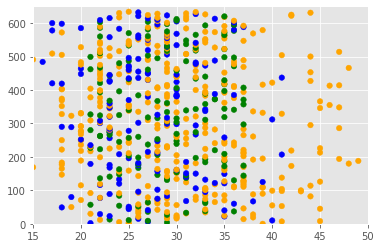

In [ ]:
f1 = artists_billboard['edad_en_billboard'].values
f2 = artists_billboard.index

colores = ['orange','blue','green']

asignar=[]
for index, row in artists_billboard.iterrows():    
    if (conValoresNulos[index]):
        asignar.append(colores[2]) # verde
    else:
        asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([15,50,0,650])
plt.show()

MAPEO DE ATRIBUTOS

Realizaremos un mapeo de los atributos de entrada para poder transformarlos a categorias que podamos utilzar en nuestro árbol de decisión

In [ ]:
separador = "### ### ###"
grouped11 = artists_billboard.groupby('mood').size()#.sum().reset_index()
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)
print(separador)
print("Tempos de Canción: " + str(artists_billboard['tempo'].unique()))
print(separador)
print("Tipos de Artista: " + str(artists_billboard['artist_type'].unique()))
print(separador)
grouped11 = artists_billboard.groupby('genre').size()#.sum().reset_index()
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)

mood
Empowering       88
Cool             78
Energizing       71
Yearning         68
Defiant          64
Excited          62
Sensual          55
Urgent           30
Sophisticated    15
Rowdy            15
Brooding         14
Upbeat           12
Aggressive       11
Melancholy       10
Gritty            9
Romantic          7
Sentimental       7
Fiery             6
Peaceful          4
Easygoing         4
Lively            2
Stirring          2
Other             1
dtype: int64
### ### ###
Tempos de Canción: ['Medium Tempo' 'Slow Tempo' 'Fast Tempo']
### ### ###
Tipos de Artista: ['Male' 'Female' 'Mixed']
### ### ###
genre
Urban                 215
Pop                   188
Traditional           113
Alternative & Punk     60
Electronica            27
Rock                   13
Other                  12
Soundtrack              5
Jazz                    2
dtype: int64


Vamos a transformar varios de los datos de entrada en valores categóricos. Las edades, las separamos en: menor de 21 años, entre 21 y 26, etc. las duraciones de canciones también, por ej. entre 150 y 180 segundos, etc. Para los estados de ánimo (mood) agrupé los que eran similares.

El Tempo que puede ser lento, medio o rápido queda mapeado: 0-Rapido, 1-Lento, 2-Medio (por cantidad de canciones en cada tempo: el Medio es el que más tiene)

In [ ]:
# Mood Mapping 
artists_billboard['moodEncoded'] = artists_billboard['mood'].map( {'Energizing': 6, 
                                        'Empowering': 6,
                                        'Cool': 5, 
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3, #coraje 
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3, 
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)
# Tempo Mapping 
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)
# Genre Mapping 
artists_billboard['genreEncoded'] = artists_billboard['genre'].map( {'Urban': 4, 
                                          'Pop': 3, 
                                          'Traditional': 2, 
                                          'Alternative & Punk': 1,
                                         'Electronica': 1, 
                                          'Rock': 1, 
                                          'Soundtrack': 0, 
                                          'Jazz': 0,
                                          'Other':0,'':0} 
                                       ).astype(int)
# artist_type Mapping 
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)


# Mapping edad en la que llegaron al billboard
artists_billboard.loc[ artists_billboard['edad_en_billboard'] <= 21, 'edadEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 21) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 30) & (artists_billboard['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
artists_billboard.loc[ artists_billboard['edad_en_billboard'] > 40, 'edadEncoded'] = 4

# Mapping Song Duration
artists_billboard.loc[ artists_billboard['durationSeg'] <= 150, 'durationEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['durationSeg'] > 150) & (artists_billboard['durationSeg'] <= 180), 'durationEncoded'] = 1
artists_billboard.loc[(artists_billboard['durationSeg'] > 180) & (artists_billboard['durationSeg'] <= 210), 'durationEncoded'] = 2
artists_billboard.loc[(artists_billboard['durationSeg'] > 210) & (artists_billboard['durationSeg'] <= 240), 'durationEncoded'] = 3
artists_billboard.loc[(artists_billboard['durationSeg'] > 240) & (artists_billboard['durationSeg'] <= 270), 'durationEncoded'] = 4
artists_billboard.loc[(artists_billboard['durationSeg'] > 270) & (artists_billboard['durationSeg'] <= 300), 'durationEncoded'] = 5
artists_billboard.loc[ artists_billboard['durationSeg'] > 300, 'durationEncoded'] = 6

In [ ]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = artists_billboard.drop(drop_elements, axis = 1)

ANALIZAMOS LOS DATOS DE ENTRADA CATEGORICOS

Finalmente obtenemos un nuevo conjunto de datos llamado artists_encoded con el que tenemos los atributos definitivos para crear nuestro árbol. Para ello, quitamos todas las columnas que no necesitamos con “drop”:

In [ ]:
artists_encoded.head()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0
3,0,4,2,1,3,1.0,2.0
4,0,4,2,2,2,2.0,3.0


In [ ]:
artists_encoded.describe()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.222047,4.344882,1.730709,2.755906,2.459843,2.028346,3.179528
std,0.415950,1.350003,0.603553,1.165463,0.740583,1.136913,1.775017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000
75%,0.000000,5.500000,2.000000,4.000000,3.000000,3.000000,4.000000
max,1.000000,6.000000,2.000000,4.000000,3.000000,4.000000,6.000000


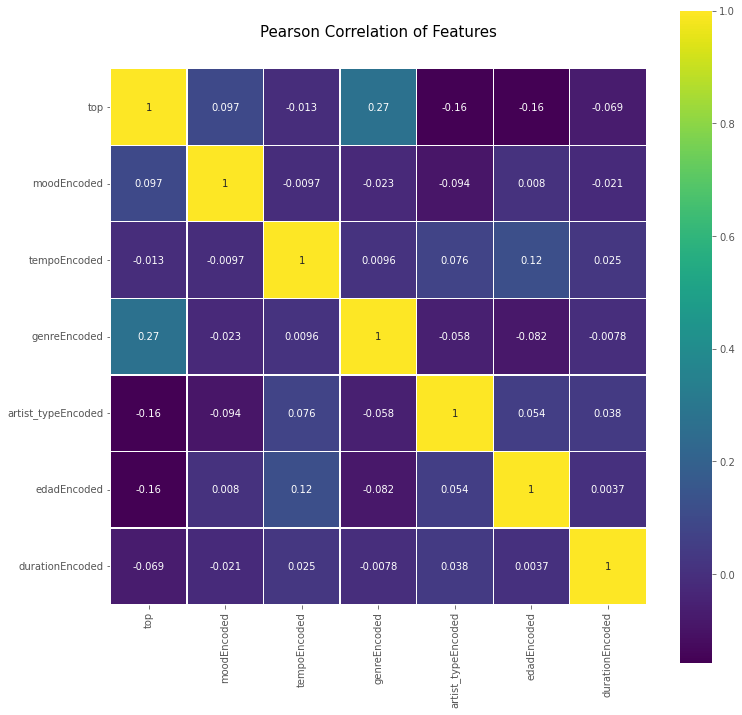

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(artists_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
artists_encoded[['moodEncoded', 'top']].groupby(['moodEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                 mean count sum
moodEncoded                    
0            0.000000     1   0
1            0.000000     8   0
2            0.274194    62  17
3            0.145631   103  15
4            0.136986   146  20
5            0.294872   156  46
6            0.270440   159  43

In [ ]:
artists_encoded[['artist_typeEncoded', 'top']].groupby(['artist_typeEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                        mean count sum
artist_typeEncoded                    
1                   0.305263    95  29
2                   0.320261   153  49
3                   0.162791   387  63

In [ ]:
artists_encoded[['genreEncoded', 'top']].groupby(['genreEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                  mean count sum
genreEncoded                    
0             0.105263    19   2
1             0.070000   100   7
2             0.008850   113   1
3             0.319149   188  60
4             0.330233   215  71

In [ ]:
artists_encoded[['tempoEncoded', 'top']].groupby(['tempoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top           
                  mean count  sum
tempoEncoded                     
0             0.226415    53   12
1             0.246154    65   16
2             0.218569   517  113

In [ ]:
artists_encoded[['durationEncoded', 'top']].groupby(['durationEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                     mean count sum
durationEncoded                    
0.0              0.295775    71  21
1.0              0.333333    30  10
2.0              0.212963   108  23
3.0              0.202381   168  34
4.0              0.232143   112  26
5.0              0.145455    55   8
6.0              0.208791    91  19

In [ ]:
artists_encoded[['edadEncoded', 'top']].groupby(['edadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                 mean count sum
edadEncoded                    
0.0          0.257576    66  17
1.0          0.314103   156  49
2.0          0.240260   154  37
3.0          0.169811   212  36
4.0          0.042553    47   2

BUSCAMOS EL ARBOL DE DECISION

Ya casi tenemos nuestro árbol. Antes de crearlo, vamos a buscar cuántos niveles de profundidad le asignaremos. Para ello, aprovecharemos la función de KFold que nos ayudará a crear varios subgrupos con nuestros datos de entrada para validar y valorar los árboles con diversos niveles de profundidad. De entre ellos, escogeremos el de mejor resultado.

Para crear el árbol utilizamos de la librería de sklearn tree.DecisionTreeClasifier pues buscamos un árbol de clasificación (no de Regresión). Lo configuramos con los parámetros:

criterion=entropy ó podría ser gini, pero utilizamos entradas categóricas
min_samples_split=20 se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
min_samples_leaf=5 cantidad mínima que puede tener una hoja final. Si tuviera menos, no se formaría esa hoja y “subiría” un nivel, su antecesor.
class_weight={1:3.5} IMPORTANTíSIMO: con esto compensamos los desbalances que hubiera. En nuestro caso, como venía diciendo anteriormente, tenemos menos etiquetas de tipo top=1 (los artistas que llegaron al número 1 del ranking). Por lo tanto, le asignamos 3.5 de peso a la etiqueta 1 para compensar. El valor sale de dividir la cantidad de top=0 (son 494) con los top=1 (son 141).
NOTA: estos valores asignados a los parámetros fueron puestos luego de prueba y error (muchas veces visualizando el árbol, en el siguiente paso y retrocediendo a este).

In [ ]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(artists_encoded))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold] 
        f_valid = artists_encoded.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['top'], axis=1), 
                               y = f_train["top"]) 
        valid_acc = model.score(X = f_valid.drop(['top'], axis=1), 
                                y = f_valid["top"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.556101
         2          0.556126
         3          0.568725
         4          0.639484
         5          0.619072
         6          0.615799
         7          0.631399


Podmeos ver que en 4 niveles de splits tenemos el score más alto, con casi 65%.

Ahora ya sólo nos queda crear y visualizar nuestro árbol de 4 niveles de profundidad.

CONSTRUIMOS EL ARBOL DE DECISION

Asignamos los datos de entrada y los parámetros que configuramos anteriormente con 4 niveles de profundidad. Utilizaremos la función de export_graphviz para crear un archivo de extensión .dot que luego convertiremos en un gráfico png para visualizar el árbol.

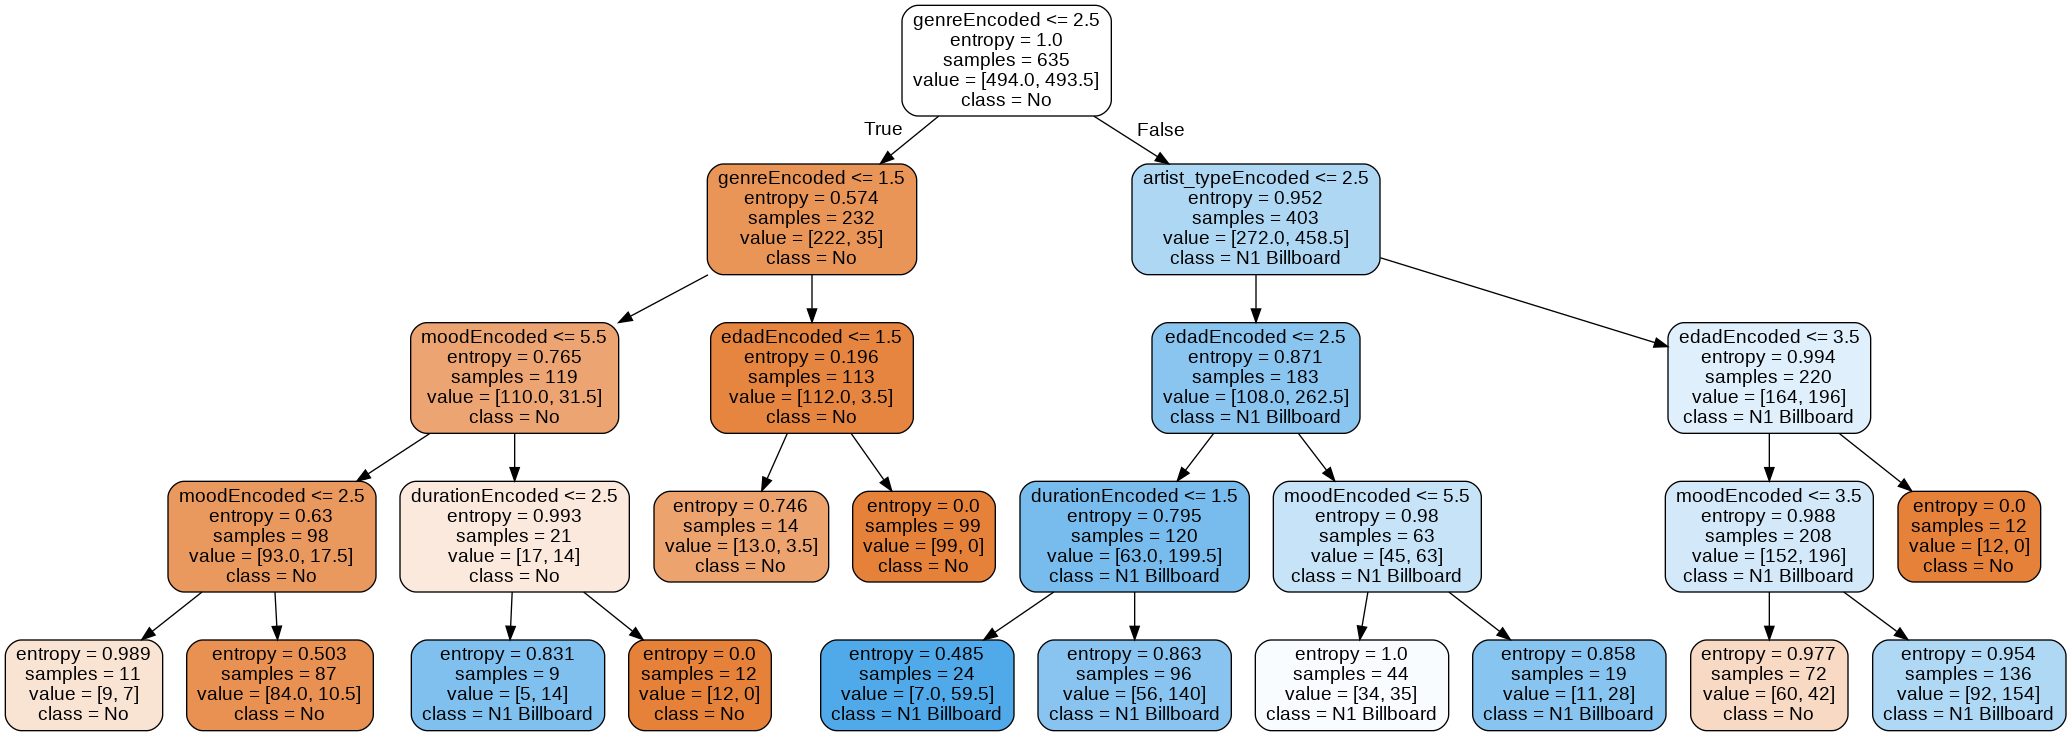

In [ ]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(artists_encoded.drop(['top'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Ahora tendremos que mirar y ver si lo podemos mejorar (por ejemplo tuneando los parámetros de entrada).

PRECISION DEL ARBOL

En la gráfica vemos, un nodo raíz que hace una primer subdivisión por género y las salidas van a izquierda por True que sea menor a 2.5, es decir los géneros 0, 1 y 2 (eran los que menos top=1 tenían) y a derecha en False van los géneros 3 y 4 que eran Pop y Urban con gran cantidad de usuarios top Billboard.

En el segundo nivel vemos que la cantidad de muestras (samples) queda repartida en 232 y 403 respectivamente.

A medida que bajamos de nivel veremos que los valores de entropía se aproximan más a 1 cuando el nodo tiene más muestras top=1 (azul) y se acercan a 0 cuando hay mayoría de muestras Top=0 (naranja).

En los diversos niveles veremos divisiones por tipo de artista , edad, duración y mood. También vemos algunas hojas naranjas que finalizan antes de llegar al último nivel: esto es porque alcanzan un nivel de entropía cero, o porque quedan con una cantidad de muestras menor a nuestro mínimo permitido para hacer split (20).

Veamos cuál fue la precisión alcanzada por nuestro árbol:

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

64.88


Nos da un valor de 68.35%. Notamos en que casi todas las hojas finales del árbol tienen samples mezclados sobre todo en los de salida para clasificar los top=1. Esto hace que se reduzca el score.

Pongamos a prueba nuestro algoritmo

PREDICCION DEL ARBOL

In [ ]:
#predecir artista CAMILA CABELLO featuring YOUNG THUG
# con su canción Havana llego a numero 1 Billboard US en 2017

x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded'))
x_test.loc[0] = (1,5,2,4,1,0,3)
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))
print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0]* 100, 2))+"%")

Prediccion: [1]
Probabilidad de Acierto: 71.43%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Vamos a testear nuestro árbol con 2 artistas que entraron al billboard 100 en 2017: Camila Cabello que llegó al numero 1 con la Canción Havana y Imagine Dragons con su canción Believer que alcanzó un puesto 42 pero no llegó a la cima.

In [ ]:
#predecir artista Imagine Dragons 
# con su canción Believer llego al puesto 42 Billboard US en 2017

x_test = pd.DataFrame(columns=('top','moodEncoded', 'tempoEncoded', 'genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded'))
x_test.loc[0] = (0,4,2,1,3,2,3)
y_pred = decision_tree.predict(x_test.drop(['top'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis = 1))
print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0]* 100, 2))+"%")

Prediccion: [0]
Probabilidad de Acierto: 88.89%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Nos da que la canción de Imagine Dragons NO llegará con una certeza del 88%. Otro acierto.

CONCLUSION

Pues hemos tenido un largo camino, para poder crear y generar nuestro árbol. Hemos revisado los datos de entrada, los hemos procesado, los pasamos a valores categóricos y generamos el árbol. Lo hemos puesto a prueba para validarlo.

Obtener un score de menos de 65% en el árbol no es un valor muy alto, pero tengamos en cuenta que nos pusimos una tarea bastante difícil de lograr: poder predecir al número 1 del Billboard y con un tamaño de muestras tan pequeño (635 registros) y desbalanceado. Ya quisieran las discográficas poder hacerlo